##  Minimize Lennard-Jones potential with Newtons Method

Here LJ parameters of Argon is taken as example.  We ahve to minimize the gradient (first derivative of LJ potential).  The result is complare with the one obtained by minimizer from SciPy

 1  0.20 -0.015
 2  0.22 -0.016
 3  0.23 -0.017
 4  0.25 -0.018
 5  0.27 -0.019
 6  0.29 -0.020
 7  0.31 -0.020
 8  0.33 -0.019
 9  0.34 -0.016
10  0.36 -0.010
11  0.37 -0.004
12  0.37 -0.001
13  0.38 -0.000
The equilibrium distance from our NR function is 0.375.
		 r(eq) from the SciPy optimizer is -0.375


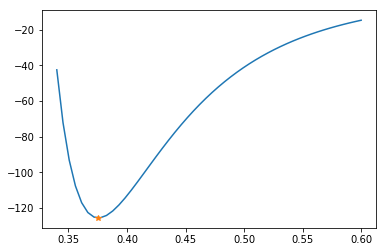

In [4]:
# 
#    Argon:
#    epsilon/KB(K) = 125.7
#    sigma (nm) =  0.3345
#    4*epsilon((sigma/r)^12-(sigma/r)^6)
#    A = 4*epsilon*sigma**12
#    B = 4*epsilon*sigma**6
#    E = A/r**12 - B/r**6

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def lj(r):
    epsilon = 125.7
    sigma =  0.3345
    A = 4*epsilon*sigma**12
    B = 4*epsilon*sigma**6
    E = A/r**12 - B/r**6
    return E

def dlj(r):
    epsilon = 125.7
    sigma =  0.3345
    A = 4*epsilon*sigma**12
    B = 4*epsilon*sigma**6
    return -12*A/r**13 + 6*B/r**7

def ddlj(r):
    epsilon = 125.7
    sigma =  0.3345
    A = 4*epsilon*sigma**12
    B = 4*epsilon*sigma**6
    return 12*13*A/r**14 - 6*7*B/r**8

def minimize(guess):
    '''
    We have to minimize the Gradient.  So, the first derivative 
    of LJ potential is our objective function for the NR mthod
    '''
    fx = dlj(guess)
    dx = ddlj(guess)
    count = 1
    while not abs(fx/dx) < 1e-6:
        dx = ddlj(guess)
        print('{:2d} {:5.2f} {:5.3f}'.format(count, guess, fx/dx))
        guess = guess - fx/dx
        fx = dlj(guess)
        
        if count > 100:
            break
        count += 1
    return guess

r = 0.2 # The guess should be near the minima.

r_eq = minimize(r)
import scipy.optimize
ref = scipy.optimize.minimize(lj, r)
print('The equilibrium distance from our NR function is {:5.3f}.'.format(r_eq))
print('\t\t r(eq) from the SciPy optimizer is {:5.3f}'.format(ref.x[0]))

x = np.linspace(0.34, 0.6, 50)
y = []
for r in x:
    y.append(lj(r))
plt.plot(x, y)
plt.plot(r_eq, lj(r_eq), marker='*')
plt.show()
